# <a id='inspection'></a> 4. [**Inspection**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/4_inspection.ipynb#inspection)</br>([*Inspection*](https://scikit-learn.org/stable/inspection.html#inspection))

La performance prédictive est souvent l'objectif principal du développement de modèles d'apprentissage automatique. Pourtant, résumer les performances avec une métrique d'évaluation est souvent insuffisant : cela suppose que la métrique d'évaluation et l'ensemble de données de test reflètent parfaitement le domaine cible, ce qui est rarement vrai. Dans certains domaines, un modèle a besoin d'un certain niveau d'**interprétabilité** avant de pouvoir être déployé. Un modèle qui présente des problèmes de performances doit être débogué pour comprendre le problème sous-jacent du modèle. Le module [**`sklearn.inspection`**](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.inspection) fournit des outils pour aider à comprendre les prédictions d'un modèle et ce qui les affecte. Cela peut être utilisé pour évaluer les hypothèses et les biais d'un modèle, concevoir un meilleur modèle ou diagnostiquer les problèmes de performances du modèle.

### Exemples

#### [**Pièges courants dans l'interprétation des coefficients des modèles linéaires**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/4_inspection/plot_linear_model_coefficient_interpretation.ipynb)<br/>([*Common pitfalls in the interpretation of coefficients of linear models*](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html))


**Volume** : 13 pages, 4 (+ 1 ancien) exemples, 3 papiers et 1 ouvrage de référence

- ✔ [**Exemples**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/5_visualizations.ipynb#examples)
- ✔ 4.1. [**Graphiques de dépendance partielle et d'espérance conditionnelle individuelle**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/4_inspection.ipynb#partial-dependence-and-individual-conditional-expectation-plots)<br/>([Partial Dependence and Individual Conditional Expectation plots](https://scikit-learn.org/stable/modules/partial_dependence.html#partial-dependence-and-individual-conditional-expectation-plots))
    - ✔ 4.1.1. [**Graphiques de dépendance partielle**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/4_inspection.ipynb#partial-dependence-plots)<br/>([*Partial dependence plots*](https://scikit-learn.org/stable/modules/partial_dependence.html#partial-dependence-plots))
    - ✔ 4.1.2. [**Diagramme d'espérance conditionnelle individuelle (ICE)**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/4_inspection.ipynb#individual-conditional-expectation-ice-plot)<br/>([*Individual conditional expectation (ICE) plot*](https://scikit-learn.org/stable/modules/partial_dependence.html#individual-conditional-expectation-ice-plot))
    - ✔ 4.1.3. [**Définition mathématique**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/4_inspection.ipynb#mathematical-definition)<br/>([*Mathematical Definition*](https://scikit-learn.org/stable/modules/partial_dependence.html#mathematical-definition))
    - ✔ 4.1.4. [**Méthodes de calcul**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/4_inspection.ipynb#computation-methods)<br/>([*Computation methods*](https://scikit-learn.org/stable/modules/partial_dependence.html#computation-methods))
- ✔ 4.2. [**Importance des caractéristiques par permutation**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/4_inspection.ipynb#permutation-feature-importance)<br/>([Permutation feature importance](https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-feature-importance))
    - ✔ 4.2.1. [**Aperçu de l'algorithme d'importance par permutation**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/4_inspection.ipynb#outline-of-the-permutation-importance-algorithm)<br/>([*Outline of the permutation importance algorithm*](https://scikit-learn.org/stable/modules/permutation_importance.html#outline-of-the-permutation-importance-algorithm))
    - ✔ 4.2.2. [**Relation avec l'importance basée sur les impuretés dans les arbres**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/4_inspection.ipynb#relation-to-impurity-based-importance-in-trees)<br/>([*Relation to impurity-based importance in trees*](https://scikit-learn.org/stable/modules/permutation_importance.html#relation-to-impurity-based-importance-in-trees))
    - ✔ 4.2.3. [**Valeurs trompeuses sur les caractéristiques fortement corrélées**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/4_inspection.ipynb#misleading-values-on-strongly-correlated-features)<br/>([*Misleading values on strongly correlated features*](https://scikit-learn.org/stable/modules/permutation_importance.html#misleading-values-on-strongly-correlated-features))

# <a id='partial-dependence-plots'></a> 4.1. Graphiques de dépendance partielle et d'espérance conditionnelle individuelle

Les diagrammes de dépendance partielle (*Partial Dependence Plots* - **PDP**) et les diagrammes d'espérance conditionnelle individuelle (*Individual Conditional expectation* - **ICE**) peuvent être utilisés pour visualiser et analyser l'interaction entre la réponse cible [**1**] et un ensemble de caractéristiques d'entrée d'intérêt.

Les PDP ([**H2009** - The Elements Of Statistical Learning](https://hastie.su.domains/ElemStatLearn/)) et les ICE ([**G2015** - Peeking Inside the Black Box: Visualizing Statistical Learning with Plots of Individual Conditional Expectation](https://arxiv.org/abs/1309.6392)) supposent que les caractéristiques d'entrée d'intérêt sont indépendantes des caractéristiques complémentaires, et cette hypothèse est souvent violée dans la pratique. Ainsi, dans le cas de caractéristiques corrélées, nous créerons des points de données absurdes pour calculer le PDP/ICE ([**M2019** - Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/)).

[1] _Pour la classification, la réponse cible peut être la probabilité d'une classe (la classe positive pour la classification binaire) ou la fonction de décision._

## <a id='partial-dependence-plots'></a> 4.1.1. Graphiques de dépendance partielle

Les diagrammes de dépendance partielle (PDP) montrent la dépendance entre la réponse cible et un ensemble de caractéristiques d'entrée d'intérêt, en marginalisant les valeurs de toutes les autres caractéristiques d'entrée (les caractéristiques "complémentaires"). Intuitivement, nous pouvons interpréter la dépendance partielle comme la réponse cible attendue en fonction des caractéristiques d'entrée d'intérêt.

En raison des limites de la perception humaine, la taille de l'ensemble des caractéristiques d'entrée d'intérêt doit être petite (généralement, une ou deux), ainsi les caractéristiques d'entrée d'intérêt sont généralement choisies parmi les caractéristiques les plus importantes.

La figure ci-dessous montre deux graphiques de dépendance partielle à sens unique et un graphique de dépendance partielle à double sens pour le jeu de données de partage de vélos, avec un [**`HistGradientBoostingRegressor`**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html#sklearn.ensemble.HistGradientBoostingRegressor) :

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_partial_dependence_006.png)

Les PDP unidirectionnels (_one-way_) nous renseignent sur l'interaction entre la réponse cible et une caractéristique d'entrée d'intérêt (par exemple, linéaire, non linéaire). Le graphique de gauche dans la figure ci-dessus montre l'effet de la température sur le nombre de locations de vélos ; nous pouvons clairement voir qu'une température plus élevée est associée à un nombre plus élevé de locations de vélos. De même, nous pourrions analyser l'effet de l'humidité sur le nombre de locations de vélos (graphique du milieu). Ainsi, ces interprétations sont marginales, en considérant une caractéristique à la fois.

Les PDP avec deux caractéristiques d'intérêt montrent les interactions entre les deux caractéristiques. Par exemple, le PDP à deux variables dans la figure ci-dessus montre la dépendance du nombre de locations de vélos sur les valeurs conjointes de la température et de l'humidité. Nous pouvons clairement observer une interaction entre les deux caractéristiques : avec une température supérieure à 20 degrés Celsius, principalement l'humidité a un fort impact sur le nombre de locations de vélos. Pour les températures plus basses, à la fois la température et l'humidité ont un impact sur le nombre de locations de vélos.

Le module [**`sklearn.inspection`**](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.inspection) fournit une fonction pratique [**`from_estimator`**](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html#sklearn.inspection.PartialDependenceDisplay.from_estimator) pour créer des tracés de dépendance partielle unidirectionnels et bidirectionnels (_two-way_). Dans l'exemple ci-dessous, nous montrons comment créer une grille de tracés de dépendance partielle : deux PDP unidirectionnels pour les caractéristiques `0` et `1` et un PDP bidirectionnel entre les deux caractéristiques :

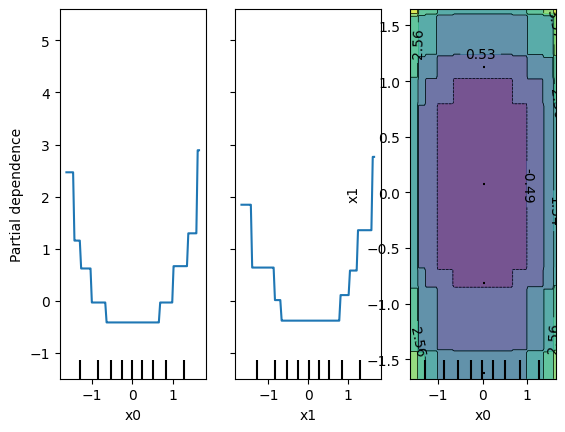

In [1]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

X, y = make_hastie_10_2(random_state=0)
clf = GradientBoostingClassifier(
    n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0
).fit(X, y)
features = [0, 1, (0, 1)]
PartialDependenceDisplay.from_estimator(clf, X, features)

Vous pouvez accéder aux objets figure et Axes nouvellement créés en utilisant `plt.gcf()` et `plt.gca()`.

Pour créer un graphique de dépendance partielle avec des caractéristiques catégorielles, vous devez spécifier quelles caractéristiques sont catégorielles en utilisant le paramètre `categorical_features`. Ce paramètre prend une liste d'indices, de noms des caractéristiques catégorielles ou un masque booléen. La représentation graphique de la dépendance partielle pour les caractéristiques catégorielles est un graphique à barres ou une carte thermique 2D.

Pour la classification multi-classes, vous devez définir l'étiquette de classe pour laquelle les PDP doivent être créés via l'argument `target` :

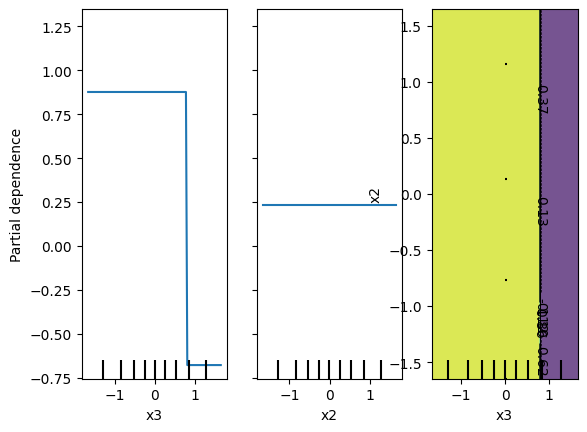

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
mc_clf = GradientBoostingClassifier(n_estimators=10, max_depth=1).fit(iris.data, iris.target)
features = [3, 2, (3, 2)]
PartialDependenceDisplay.from_estimator(mc_clf, X, features, target=0)

La même paramètre `target` est utilisée pour spécifier la cible dans les paramètres de régression à sorties multiples.

Si vous avez besoin des valeurs brutes de la fonction de dépendance partielle plutôt que des tracés, vous pouvez utiliser la fonction [**`sklearn.inspection.partial_dependence`**](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.partial_dependence.html#sklearn.inspection.partial_dependence) :

In [3]:
from sklearn.inspection import partial_dependence

results = partial_dependence(clf, X, [0])
results["average"]
# array([[ 2.466...,  2.466..., ...
results["values"]
# [array([-1.624..., -1.592..., ...

c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


[array([-1.62497055, -1.59201391, -1.55905727, -1.52610063, -1.493144  ,
        -1.46018736, -1.42723072, -1.39427408, -1.36131745, -1.32836081,
        -1.29540417, -1.26244753, -1.22949089, -1.19653426, -1.16357762,
        -1.13062098, -1.09766434, -1.06470771, -1.03175107, -0.99879443,
        -0.96583779, -0.93288115, -0.89992452, -0.86696788, -0.83401124,
        -0.8010546 , -0.76809797, -0.73514133, -0.70218469, -0.66922805,
        -0.63627141, -0.60331478, -0.57035814, -0.5374015 , -0.50444486,
        -0.47148823, -0.43853159, -0.40557495, -0.37261831, -0.33966167,
        -0.30670504, -0.2737484 , -0.24079176, -0.20783512, -0.17487849,
        -0.14192185, -0.10896521, -0.07600857, -0.04305193, -0.0100953 ,
         0.02286134,  0.05581798,  0.08877462,  0.12173126,  0.15468789,
         0.18764453,  0.22060117,  0.25355781,  0.28651444,  0.31947108,
         0.35242772,  0.38538436,  0.418341  ,  0.45129763,  0.48425427,
         0.51721091,  0.55016755,  0.58312418,  0.6

Les valeurs auxquelles la dépendance partielle doit être évaluée sont directement générées à partir de `X`. Pour une dépendance partielle à 2 facteurs, une grille 2D de valeurs est générée. Le champ `values` renvoyé par [**`sklearn.inspection.partial_dependence`**](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.partial_dependence.html#sklearn.inspection.partial_dependence) donne les valeurs réelles utilisées dans la grille pour chaque caractéristique d'entrée d'intérêt. Ils correspondent également à l'axe des tracés.

## <a id='individual-conditional-expectation-ice-plot'></a> 4.1.2. Graphique d'espérance conditionnelle individuelle (ICE)

Similaire à un graphique de dépendance partielle (PDP), un graphique d'espérance conditionnelle individuelle (ICE) montre la dépendance entre la fonction cible et une caractéristique d'entrée d'intérêt. Cependant, contrairement à un PDP qui montre l'effet moyen de la caractéristique d'entrée, un graphique ICE visualise l'espérance de la prédiction sur une caractéristique pour chaque échantillon séparément, avec une ligne par échantillon. En raison des limites de la perception humaine, un seul trait caractéristique d'intérêt est pris en charge pour les graphiques ICE.

Les figures ci-dessous montrent deux graphiques ICE pour le jeu de données de partage de vélos, avec un [`HistGradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html). Les figures représentent la ligne PD correspondante superposée aux lignes ICE.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_partial_dependence_004.png)

Alors que les PDP sont bons pour montrer l'effet moyen des caractéristiques cibles, ils peuvent masquer une relation hétérogène créée par les interactions. Lorsque des interactions sont présentes, le graphique ICE fournira beaucoup plus d'informations. Par exemple, nous pourrions observer une relation linéaire entre le revenu médian et le prix de l'immobilier dans la ligne PD. Cependant, les lignes ICE montrent qu'il existe quelques exceptions, où le prix de l'immobilier reste constant dans certaines fourchettes du revenu médian.

La fonction utilitaire [`PartialDependenceDisplay.from_estimator`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html#sklearn.inspection.PartialDependenceDisplay.from_estimator) du module [`sklearn.inspection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.inspection) peut être utilisée pour créer des tracés ICE en définissant `kind='individual'`. Dans l'exemple ci-dessous, nous montrons comment créer une grille de tracés ICE :

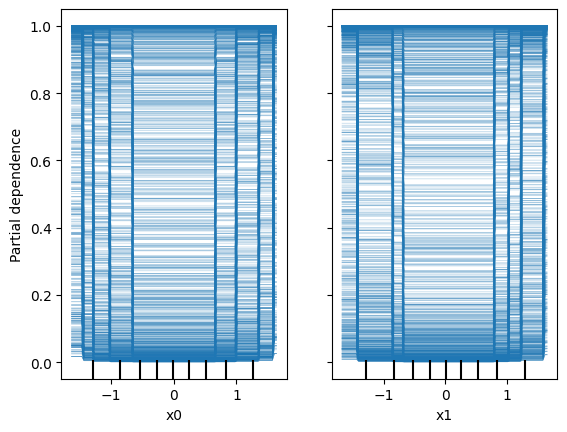

In [4]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

X, y = make_hastie_10_2(random_state=0)
clf = GradientBoostingClassifier(
    n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0
).fit(X, y)
features = [0, 1]
PartialDependenceDisplay.from_estimator(clf, X, features, kind='individual')

Dans les tracés ICE, il peut être difficile de voir l'effet moyen de la caractéristique d'entrée qui vous intéresse. Par conséquent, il est recommandé d'utiliser des diagrammes ICE parallèlement aux PDP. Ils peuvent être tracés avec `kind='both'`.

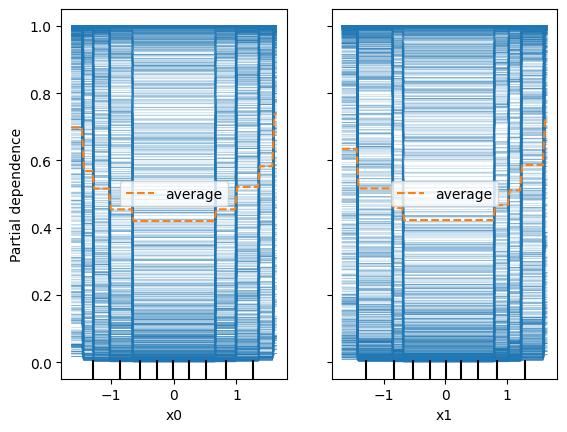

In [5]:
PartialDependenceDisplay.from_estimator(clf, X, features, kind='both')

S'il y a trop de lignes dans un graphique ICE, il peut être difficile de voir les différences entre les échantillons individuels et d'interpréter le modèle. Le centrage de l'ICE sur la première valeur sur l'axe des x produit des tracés centrés de l'espérance conditionnelle individuelle (cICE) [G2015](https://arxiv.org/abs/1309.6392). Cela met l'accent sur la divergence des espérances conditionnelles individuelles par rapport à la ligne moyenne, ce qui facilite l'exploration des relations hétérogènes. Les diagrammes cICE peuvent être tracés en définissant `centered=True` :

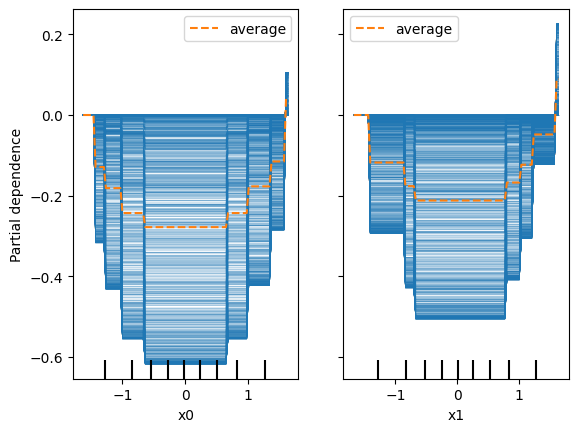

In [6]:
PartialDependenceDisplay.from_estimator(clf, X, features, kind='both', centered=True)

## <a id='mathematical-definition'></a> 4.1.3. Définition mathématique

Soit $X_S$ l'ensemble des caractéristiques d'entrée d'intérêt (c'est-à-dire le paramètre `features`) et soit $X_C$ son complément.

La dépendance partielle de la réponse $f$ à un point $x_S$ est définie comme:

$$
\begin{split}
    pd_{X_S}(x_S) &\overset{def}{=} \mathbb{E}_{X_C}\left[ f(x_S, X_C) \right]\\
    &= \int f(x_S, x_C) p(x_C) dx_C,
\end{split}
$$

où $f(x_S, x_C)$ est la fonction de réponse ([predict](https://scikit-learn.org/stable/glossary.html#term-predict), [predict_proba](https://scikit-learn.org/stable/glossary.html#term-predict_proba) ou [decision_function](https://scikit-learn.org/stable/glossary.html#term-decision_function)) pour un échantillon donné dont les valeurs sont définies par $x_S$ pour les caractéristiques dans $X_S$, et par $x_C$ pour les caractéristiques dans $X_C$. Notez que $x_S$ et $x_C$ peuvent être des tuples.

Le calcul de cette intégrale pour différentes valeurs de $x_S$ produit un tracé PDP comme ci-dessus. Une ligne ICE est définie comme un seul $f(x_S, x^{(i)}_C)$ évalué à $x_S$.

## <a id='computation-methods'></a> 4.1.4. Méthodes de calcul

Il existe deux méthodes principales pour approximer l'intégrale ci-dessus, à savoir les méthodes "brute" et "récursive". Le paramètre `method` contrôle la méthode à utiliser.

La méthode "brute" est une méthode générique qui fonctionne avec n'importe quel estimateur. Notez que le calcul des tracés ICE n'est pris en charge qu'avec la méthode "brute". Il se rapproche de l'intégrale ci-dessus en calculant une moyenne sur les données `X` :

$$
pd_{X_S}(x_S) \approx \frac{1}{n_\text{samples}} \sum_{i=1}^n f(x_S, x_C^{(i)}),
$$

où $x_C^{(i)}$ est la valeur du ième échantillon pour les entités dans $X_C$. Pour chaque valeur de $x_S$, cette méthode nécessite un passage complet sur l'ensemble de données `X` qui est gourmand en calculs.

Chacun des $f(x_{S}, x_{C}^{(i)})$ correspond à une ligne ICE évaluée à $x_S$. En calculant ceci pour plusieurs valeurs de $x_S$, on obtient une ligne ICE complète. Comme on peut le voir, la moyenne des lignes ICE correspond à la ligne de dépendance partielle.

La méthode «récursive» est plus rapide que la méthode «brute», mais elle n'est prise en charge que pour les diagrammes PDP par certains estimateurs basés sur des arbres. Il est calculé comme suit. Pour un point donné $x_S$, un parcours d'arbre pondéré est effectué : si un nœud divisé implique une caractéristique d'entrée d'intérêt, la branche gauche ou droite correspondante est suivie ; sinon, les deux branches sont suivies, chaque branche étant pondérée par la fraction d'échantillons d'apprentissage qui sont entrés dans cette branche. Enfin, la dépendance partielle est donnée par une moyenne pondérée de toutes les valeurs de feuilles visitées.

Avec la méthode "brute", le paramètre `X` est utilisé à la fois pour générer la grille de valeurs $x_S$ et les valeurs des caractéristiques complémentaires $x_C$. Cependant avec la méthode "récursive", `X` n'est utilisé que pour les valeurs de la grille : implicitement, les valeurs $x_C$ sont celles des données d'apprentissage.

Par défaut, la méthode "récursive" est utilisée pour tracer les PDP sur des estimateurs arborescents qui la prennent en charge, et la méthode "brute" est utilisée pour le reste.

> **Remarque** : Bien que les deux méthodes devraient être proches en général, elles peuvent différer suivant certaines configurations spécifiques. La méthode "brute" suppose l'existence des points de données $(x_{S}, x_{C}^{(i)})$. Lorsque les caractéristiques sont corrélées, ces échantillons artificiels peuvent avoir une masse de probabilité très faible. Les méthodes "brute" et "récursive" seront probablement en désaccord sur la valeur de la dépendance partielle, car elles traiteront différemment ces échantillons improbables. Rappelez-vous, cependant, que l'hypothèse principale pour l'interprétation des PDP est que les caractéristiques doivent être indépendantes.

### Exemples

#### [**Graphiques de dépendance partielle et d'espérance conditionnelle individuelle**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/4_inspection/plot_partial_dependence.ipynb)<br/>([*Partial Dependence and Individual Conditional Expectation Plots*](https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html))

## Références

[H2009] T. Hastie, R. Tibshirani et J. Friedman, [“**Elements of Statistical Learning Ed. 2**](https://hastie.su.domains/Papers/ESLII.pdf)[”](https://drive.google.com/file/d/1wbK7Ii8bQliX7D3rKyGoR0-gxqJZ11iN/view?usp=share_link), Springer, 2009.

[M2019] C. Molnar, [“**Interpretable Machine Learning**](https://christophm.github.io/interpretable-ml-book/)[”](https://drive.google.com/file/d/1-iaVNQSIvUMYS--Ivik2fyKTRDlcpVyF/view?usp=drive_link), Section 5.1, 2019.

[G2015] (1, 2) A. Goldstein, A. Kapelner, J. Bleich, and E. Pitkin, [“**Peeking Inside the Black Box: Visualizing Statistical Learning With Plots of Individual Conditional Expectation**](https://arxiv.org/abs/1309.6392)[”](https://drive.google.com/file/d/1zGXt3Wk54sYV4fJaj4lhuotHDlQ9CLsN/view?usp=share_link). Journal of Computational and Graphical Statistics, 24(1): 44-65, 2015

# <a id='permutation-feature-importance'></a> 4.2. Importance des caractéristiques par permutation

L'importance des caractéristiques par permutation est une technique d'inspection de modèle qui peut être utilisée pour tout [estimateur](https://scikit-learn.org/stable/glossary.html#term-estimator) [ajusté](https://scikit-learn.org/stable/glossary.html#term-fitted) lorsque les données sont tabulaires. Ceci est particulièrement utile pour les estimateurs non linéaires ou opaques. L'importance de la caractéristique de permutation est définie comme étant la diminution du score d'un modèle lorsqu'une seule valeur de caractéristique est mélangée de manière aléatoire [1]. Cette procédure rompt la relation entre la caractéristique et la cible, ainsi la baisse du score du modèle indique à quel point le modèle dépend de la caractéristique. Cette technique bénéficie du fait qu'elle est indépendante du modèle et peut être calculée plusieurs fois avec différentes permutations de la caractéristique.

> **Avertissement** Les caractéristiques jugées **peu importantes pour un mauvais modèle** (faible score de validation croisée) pourraient être **très importantes pour un bon modèle**. Par conséquent, il est toujours important d'évaluer le pouvoir prédictif d'un modèle à l'aide d'un ensemble retenu (ou mieux avec une validation croisée) avant de calculer les importances. L'importance par permutation ne reflète pas la valeur prédictive intrinsèque d'une caractéristique en elle-même, mais l'**importance de cette caractéristique pour un modèle particulier**.

La fonction [**`permutation_importance`**](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html) calcule l'importance des caractéristiques des [estimateurs](https://scikit-learn.org/stable/glossary.html#term-estimators) pour un jeu de données donné. Le paramètre `n_repeats` définit le nombre de fois qu'une caractéristique est mélangée de manière aléatoire et renvoie un échantillon d'importance des caractéristiques.

Considérons le modèle de régression entraîné suivant :

In [7]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
diabetes = load_diabetes()
X_train, X_val, y_train, y_val = train_test_split(diabetes.data, diabetes.target, random_state=0)
model = Ridge(alpha=1e-2).fit(X_train, y_train)
model.score(X_val, y_val)

0.3566675322939422

Ses performances de validation, mesurées via le score $R^2$, sont nettement supérieures au niveau de chance. Cela permet d'utiliser la fonction [**`permutation_importance`**](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance) pour sonder quelles caractéristiques sont les plus prédictives :

In [8]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_val, y_val, n_repeats=30, random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{diabetes.feature_names[i]:<8}"
            f"{r.importances_mean[i]:.3f}"
            f" +/- {r.importances_std[i]:.3f}")

s5      0.204 +/- 0.050
bmi     0.176 +/- 0.048
bp      0.088 +/- 0.033
sex     0.056 +/- 0.023


Notez que les valeurs d'importance pour les principales caractéristiques représentent une grande partie du score de référence de 0,356.

Les importances par permutation peuvent être calculées soit sur l'ensemble d'apprentissage, soit sur un ensemble de test ou de validation retenu. L'utilisation d'un ensemble retenu permet de mettre en évidence les caractéristiques qui contribuent le plus au pouvoir de généralisation du modèle inspecté. Les caractéristiques qui sont importantes sur l'ensemble d'entraînement mais pas sur l'ensemble retenu peuvent entraîner un surajustement du modèle.

L'importance de caractéristique par permutation est la diminution du score d'un modèle lorsqu'une seule valeur de caractéristique est mélangée de manière aléatoire. La fonction de score à utiliser pour le calcul des importances peut être spécifiée avec l'argument `scoring`, qui accepte également plusieurs évaluateurs. L'utilisation de plusieurs évaluateurs est plus efficace en termes de calcul que l'appel séquentiel de [**`permutation_importance`**](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html) plusieurs fois avec un évaluateur différent, car il réutilise les prédictions du modèle.

Un exemple d'utilisation de plusieurs évaluateurs est illustré ci-dessous, utilisant une liste de métriques, mais d'autres formats d'entrée sont possibles, comme documenté dans [**Utilisation de l'évaluation de plusieurs métriques** (3.3.1.4)](https://scikit-learn.org/stable/modules/model_evaluation.html#multimetric-scoring).

In [9]:
scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']
r_multi = permutation_importance(model, X_val, y_val, n_repeats=30, random_state=0, scoring=scoring)
for metric in r_multi:
    print(f"{metric}")
    r = r_multi[metric]
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"    {diabetes.feature_names[i]:<8}"
                  f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")

r2
    s5      0.204 +/- 0.050
    bmi     0.176 +/- 0.048
    bp      0.088 +/- 0.033
    sex     0.056 +/- 0.023
neg_mean_absolute_percentage_error
    s5      0.081 +/- 0.020
    bmi     0.064 +/- 0.015
    bp      0.029 +/- 0.010
neg_mean_squared_error
    s5      1013.866 +/- 246.445
    bmi     872.726 +/- 240.298
    bp      438.663 +/- 163.022
    sex     277.376 +/- 115.123


Le classement des caractéristiques est approximativement le même pour différentes métriques même si les échelles des valeurs d'importance sont très différentes. Cependant, cela n'est pas garanti et des métriques différentes peuvent conduire à des importances de caractéristiques significativement différentes, en particulier pour les modèles entraînés pour des problèmes de classification déséquilibrés, pour lesquels le choix de la métrique de classification peut être critique.

## <a id='outline-of-the-permutation-importance-algorithm'></a> 4.2.1. Aperçu de l'algorithme d'importance par permutation

* Entrées : modèle prédictif ajusté $m$, jeu de données tabulaire (entraînement ou validation) $D$.
* Calculer le score de référence $s$ du modèle $m$ sur les données $D$ (par exemple la précision d'un classifieur ou le $R^2$ pour un régresseur).
* Pour chaque caractéristique $j$ (colonne de $D$) :
     * A chaque répétition $k$ dans $1, \cdots, K$.
          * Mélanger au hasard la colonne $j$ de l'ensemble de données $D$ pour générer une version corrompue des données nommée $\tilde{D}_{k,j}$.
          * Calculer le score $s_{k,j}$ du modèle sur des données corrompues $\tilde{D}_{k,j}$.
     * Calculer l'importance $i_j$ pour la caractéristique $f_j$ définie comme :

$$
i_j = s - \frac{1}{K} \sum_{k=1}^{K} s_{k,j}
$$

## <a id='relation-to-impurity-based-importance-in-trees'></a> 4.2.2. Relation avec l'importance basée sur les impuretés dans les arbres

Les modèles arborescents fournissent une autre mesure de l'[**importance des caractéristiques basée sur la diminution moyenne des impuretés** (1.11.2.5)](https://scikit-learn.org/stable/modules/ensemble.html#random-forest-feature-importance) (MDI). L'impureté est quantifiée par le critère de découpage des arbres de décision (Gini, Log Loss ou Mean Squared Error). Cependant, cette méthode peut accorder une grande importance aux caractéristiques qui peuvent ne pas être prédictives sur des données non vues lorsque le modèle est surajusté. L'importance des caractéristiques basée sur la permutation, en revanche, évite ce problème, car elle peut être calculée sur des données non vues.

De plus, l'importance des caractéristiques basées sur les impuretés pour les arbres est **fortement biaisée** et **favorise les caractéristiques de cardinalité élevée** (généralement des caractéristiques numériques) par rapport aux caractéristiques de faible cardinalité telles que les caractéristiques binaires ou les variables catégorielles avec un petit nombre de catégories possibles.

Les importances de caractéristiques basées sur la permutation ne présentent pas un tel biais. De plus, l'importance de la caractéristique par permutation peut être une métrique de performance calculée sur les prédictions du modèle et peut être utilisée pour analyser n'importe quelle classe de modèle (pas seulement des modèles basés sur des arbres).

L'exemple suivant met en évidence les limites de l'importance des caractéristiques basée sur les impuretés par opposition à l'importance des caractéristiques basée sur la permutation : [**Importance par permutation vs. Importance de caractéristique de forêt aléatoire (MDI)**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/4_inspection/plot_permutation_importance.ipynb).

## <a id='misleading-values-on-strongly-correlated-features'></a> 4.2.3. Valeurs trompeuses sur les caractéristiques fortement corrélées

Lorsque deux caractéristiques sont corrélées et que l'une des caractéristiques est permutée, le modèle aura toujours accès à la caractéristique via sa caractéristique corrélée. Cela se traduira par une valeur d'importance inférieure pour les deux caractéristiques, où elles pourraient en fait être importantes.

Une façon de gérer cela consiste à regrouper les caractéristiques qui sont corrélées et à ne conserver qu'une seule caractéristique de chaque cluster. Cette stratégie est explorée dans l'exemple suivant : [**Importance par permutation avec des caractéristique multi-colinéaires ou corrélées**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/4_inspection/plot_permutation_importance_multicollinear.ipynb).

### Exemples

#### [**Importance par permutation vs. Importance de caractéristique de forêt aléatoire (MDI)**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/4_inspection/plot_permutation_importance.ipynb)<br/>([*Permutation Importance vs Random Forest Feature Importance (MDI)*](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html))

#### [**Importance par permutation avec des caractéristique multi-colinéaires ou corrélées**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/4_inspection/plot_permutation_importance_multicollinear.ipynb)<br/>([*Permutation Importance with Multicollinear or Correlated Features*](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html))

## Références

[B2001] L. Breiman, [“**Random Forests**](https://link.springer.com/content/pdf/10.1023/A:1010933404324.pdf)[”](https://drive.google.com/file/d/1Kb5Z81PDb2d_HGi0OBzJjWOzIq834G0y/view?usp=share_link), Machine Learning, 45(1), 5-32, 2001.